In [6]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np

In [26]:
def show(image):
    # Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10, 10))
    plt.imshow(mask, cmap='gray')
    
def overlay_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(img)

In [72]:
image = cv2.imread('strawberry.jpg')

In [73]:
image.shape

(600, 800, 3)

In [74]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b', 'g', 'r'])
df.describe()

b              g              r
count  480000.000000  480000.000000  480000.000000
mean       79.659610      99.712875      90.914885
std        53.726915      59.420565      67.753404
min         0.000000       0.000000       0.000000
25%        39.000000      51.000000      39.000000
50%        65.000000      94.000000      67.000000
75%       107.000000     136.000000     129.000000
max       255.000000     255.000000     255.000000

In [75]:

# Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize to a third of the size
#image = cv2.resize(image, None, fx=1/3, fy=1/3)

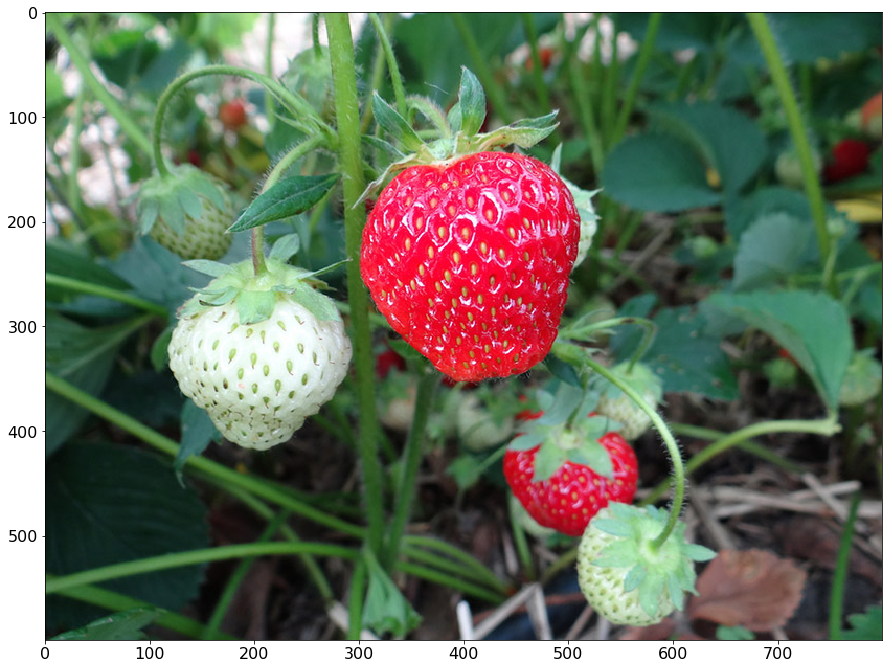

In [76]:
show(image)

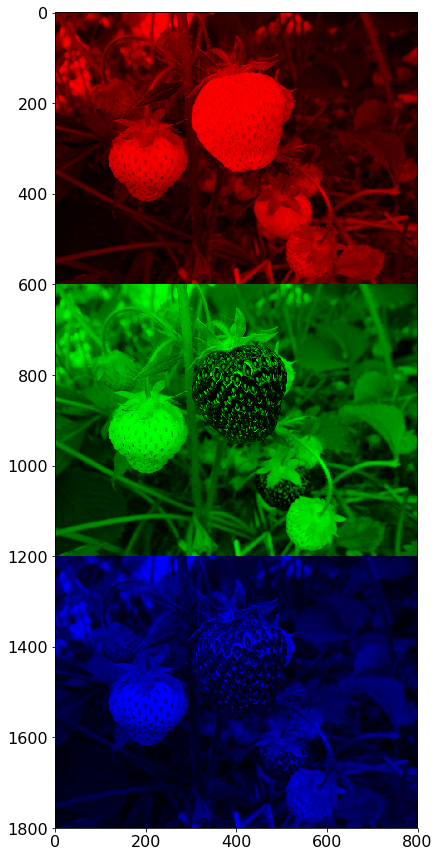

In [77]:
images = []
for i in [0, 1, 2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    images.append(colour)
    
show(np.vstack(images))

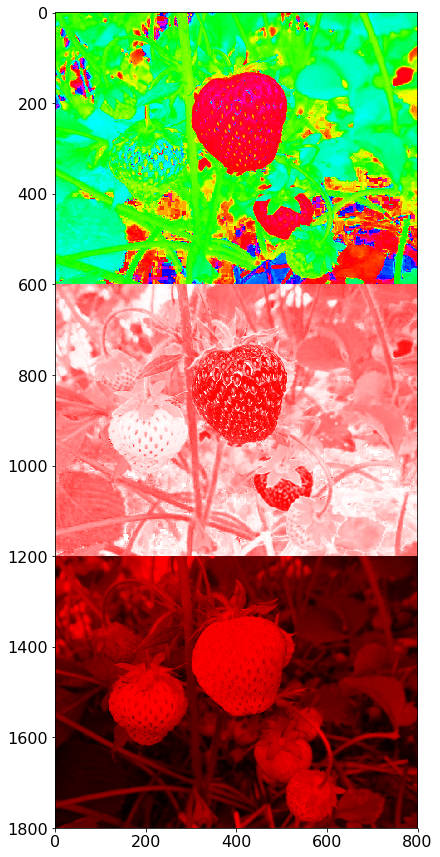

In [78]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

images = []
for i in [0, 1, 2]:
    colour = hsv.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 255
    if i != 2: colour[:,:,2] = 255
    images.append(colour)
    
hsv_stack = np.vstack(images)
rgb_stack = cv2.cvtColor(hsv_stack, cv2.COLOR_HSV2RGB)
show(rgb_stack)

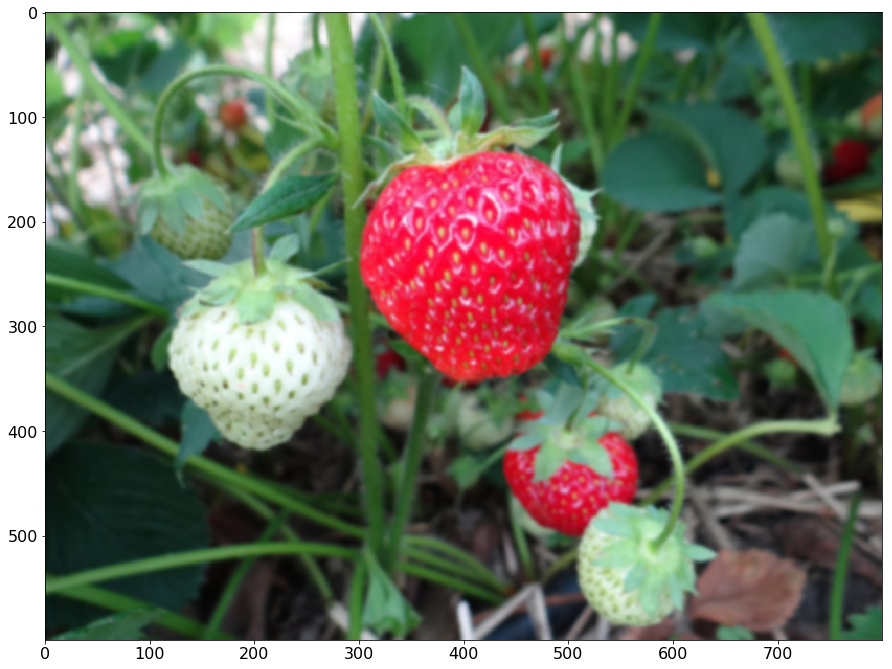

In [79]:
# Blur image slightly
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

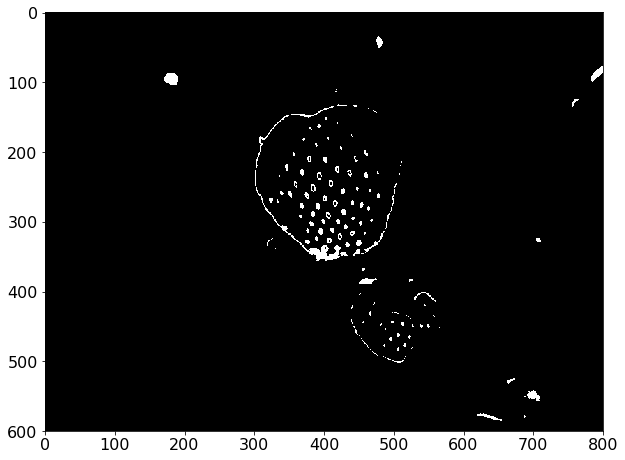

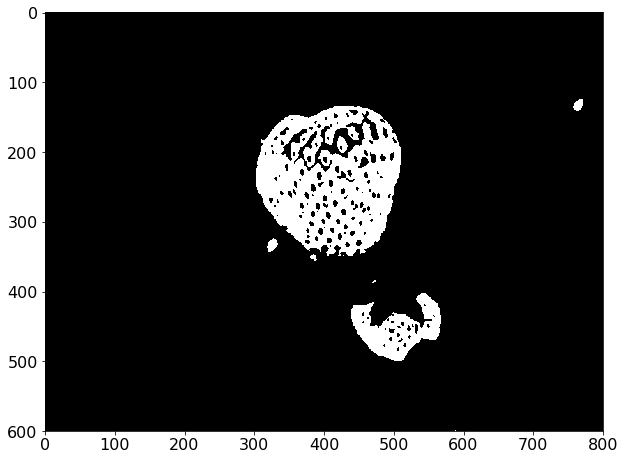

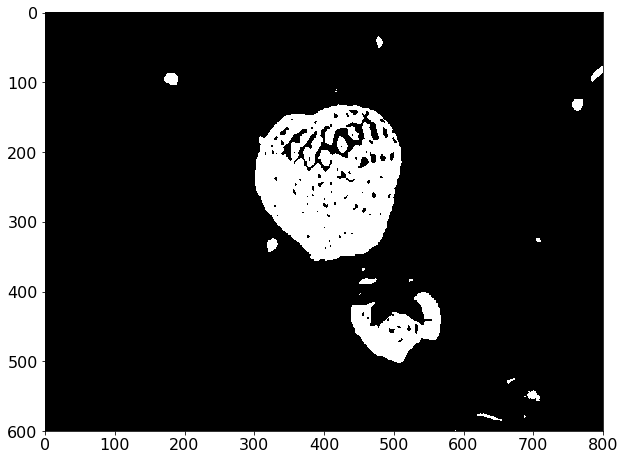

In [80]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_red = np.array([0, 100, 80])
max_red = np.array([10, 256, 256])
image_red1 = cv2.inRange(image_blur_hsv, min_red, max_red)

# 170-180 hue
min_red2 = np.array([170, 100, 80])
max_red2 = np.array([180, 256, 256])
image_red2 = cv2.inRange(image_blur_hsv, min_red2, max_red2)

show_mask(image_red1)
show_mask(image_red2)
image_red = image_red1 + image_red2
show_mask(image_red)

In [81]:
image_red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

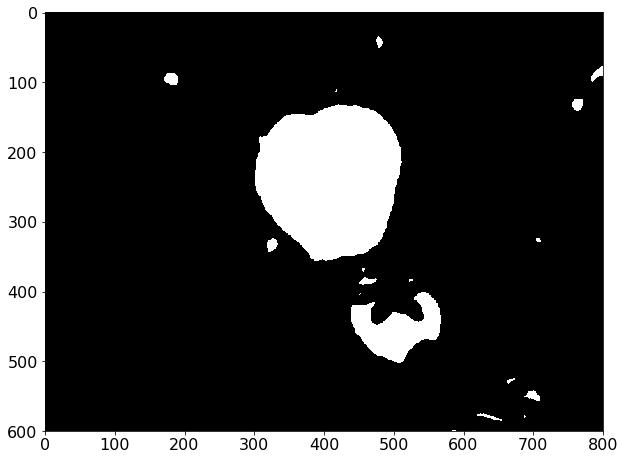

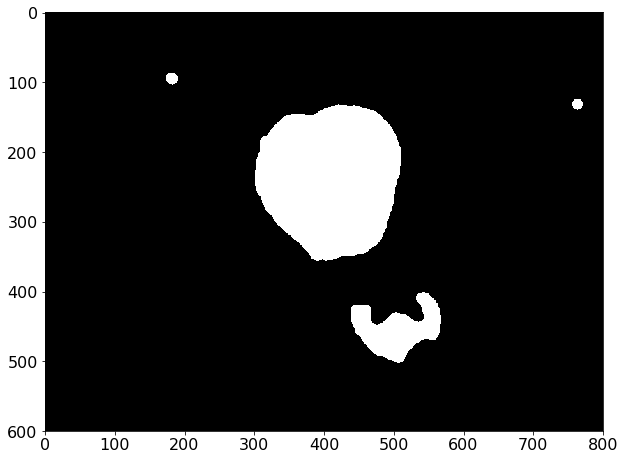

In [82]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_red_closed = cv2.morphologyEx(image_red, cv2.MORPH_CLOSE, kernel)
show_mask(image_red_closed)

# Remove specks
image_red_closed_then_opened = cv2.morphologyEx(image_red_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_red_closed_then_opened)

[array([[[540, 401]],

       [[539, 402]],

       [[536, 402]],

       [[533, 405]],

       [[533, 406]],

       [[532, 407]],

       [[532, 411]],

       [[533, 412]],

       [[533, 413]],

       [[535, 415]],

       [[535, 416]],

       [[539, 420]],

       [[539, 421]],

       [[540, 422]],

       [[540, 423]],

       [[541, 424]],

       [[541, 429]],

       [[542, 430]],

       [[542, 432]],

       [[543, 433]],

       [[543, 438]],

       [[542, 439]],

       [[542, 440]],

       [[539, 443]],

       [[536, 443]],

       [[535, 444]],

       [[534, 443]],

       [[531, 443]],

       [[530, 442]],

       [[529, 442]],

       [[528, 441]],

       [[527, 441]],

       [[523, 437]],

       [[522, 437]],

       [[520, 435]],

       [[519, 435]],

       [[518, 434]],

       [[517, 434]],

       [[516, 433]],

       [[513, 433]],

       [[512, 432]],

       [[509, 432]],

       [[508, 431]],

       [[505, 431]],

       [[504, 430]],

       [[

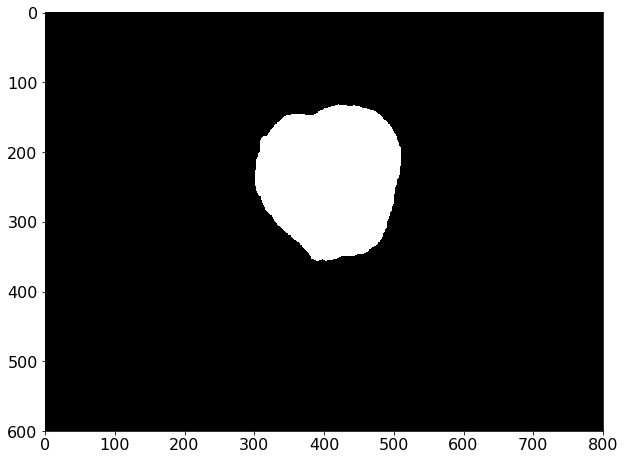

In [83]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    im3, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, red_mask = find_biggest_contour(image_red_closed_then_opened)
show_mask(red_mask)

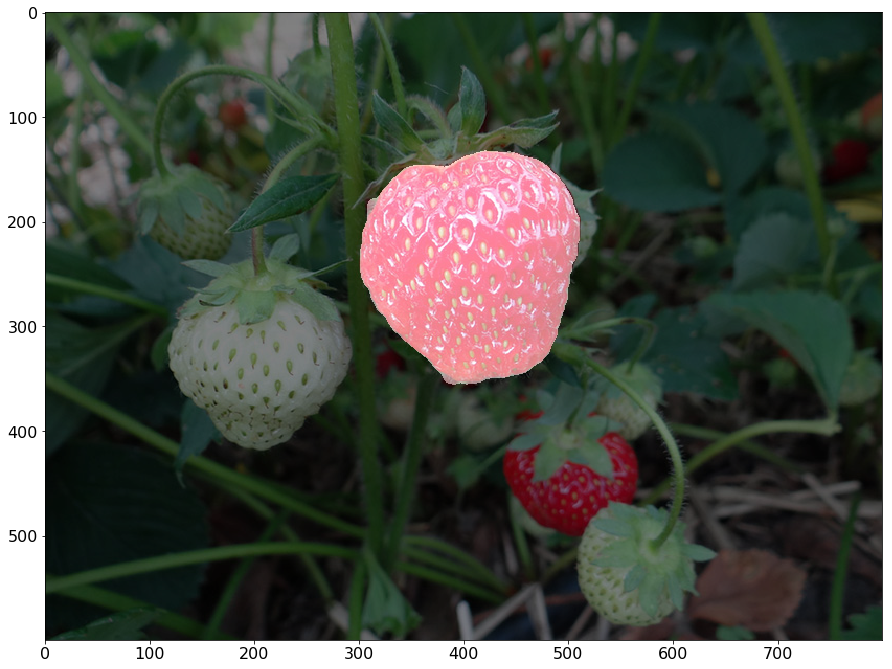

In [84]:
overlay_mask(red_mask, image)

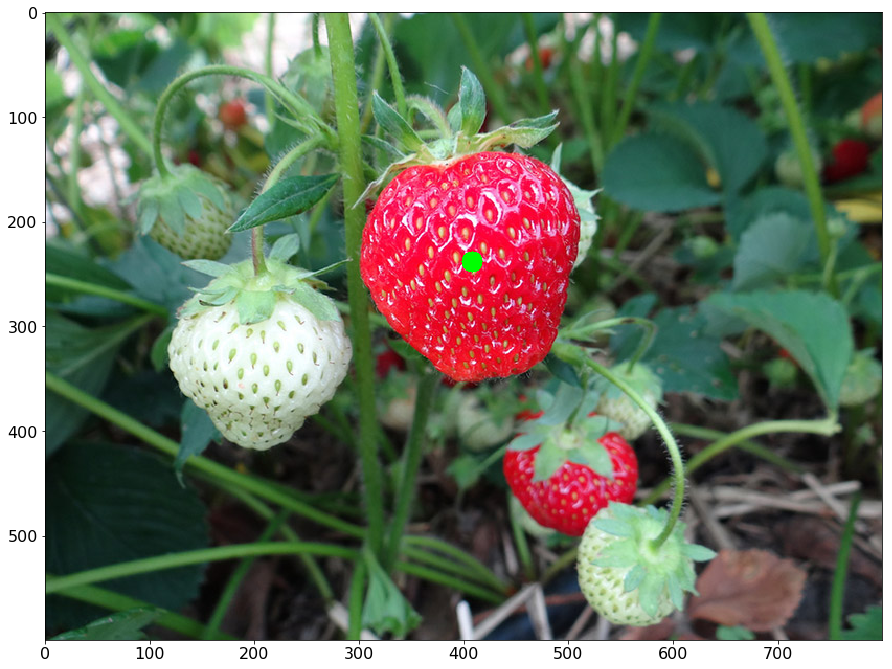

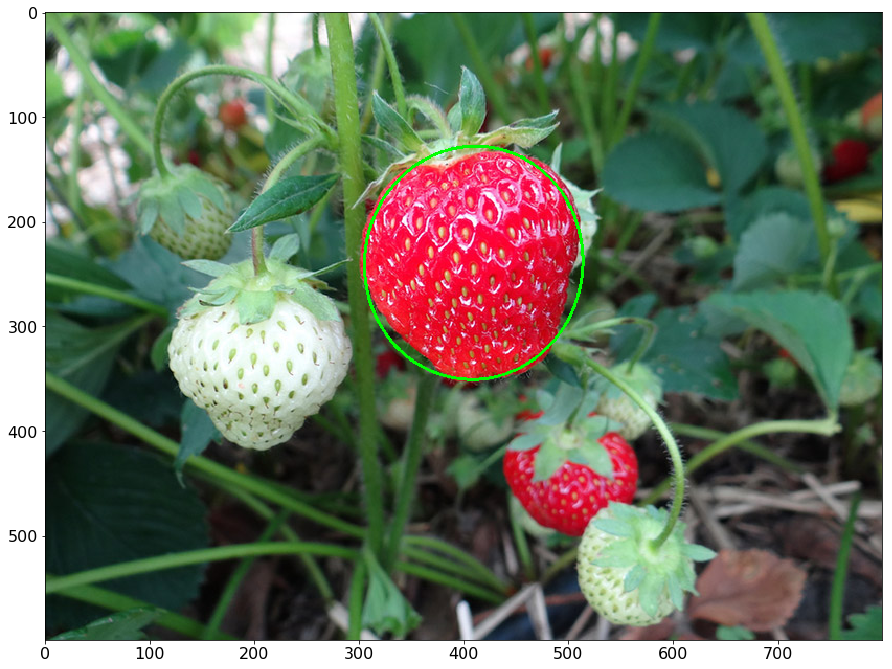

In [85]:
# Centre of mass
moments = cv2.moments(red_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

In [86]:
ret,thresh = cv2.threshold(image,127,255,0)
im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print( M )

error: C:\ci\opencv_1512684736357\work\modules\imgproc\src\contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl
